# TASK 3 : Prediction using Decision Tree Algorithm

In [112]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [54]:
#Read the dataset file of iris data
iris_data= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
columns = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'Species']

In [56]:
iris_data.columns = columns
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [57]:
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [58]:
iris_data.tail()

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
iris_data.shape

(149, 5)

In [60]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_lenght  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [61]:
iris_data.describe()

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
iris_data.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_lenght    0
petal_width     0
Species         0
dtype: int64

In [63]:
iris_data.value_counts()

sepal_lenght  sepal_width  petal_lenght  petal_width  Species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
6.2           3.4          5.4           2.3          Iris-virginica     1
6.3           2.3          4.4           1.3          Iris-versicolor    1
              2.5          4.9           1.5          Iris-versicolor    1
                                                                        ..
5.5           2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
              2.6          4.4           1.2          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 146, dtype: int64

In [64]:
iris_data.dtypes

sepal_lenght    float64
sepal_width     float64
petal_lenght    float64
petal_width     float64
Species          object
dtype: object

# Visualization

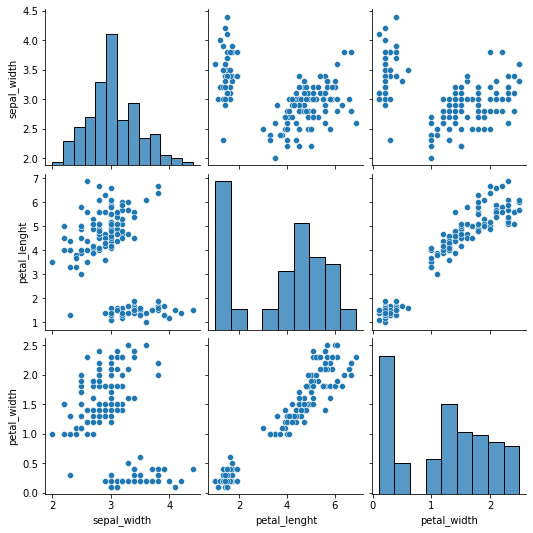

In [65]:

#Pairplot
sns.pairplot(iris_data.iloc[:,1:])

array([[<AxesSubplot:title={'center':'sepal_lenght'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_lenght'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

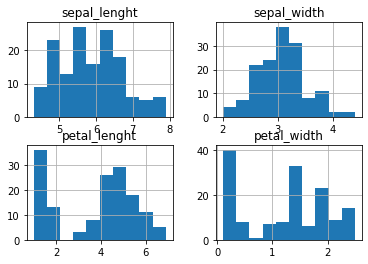

In [66]:
iris_data.hist()

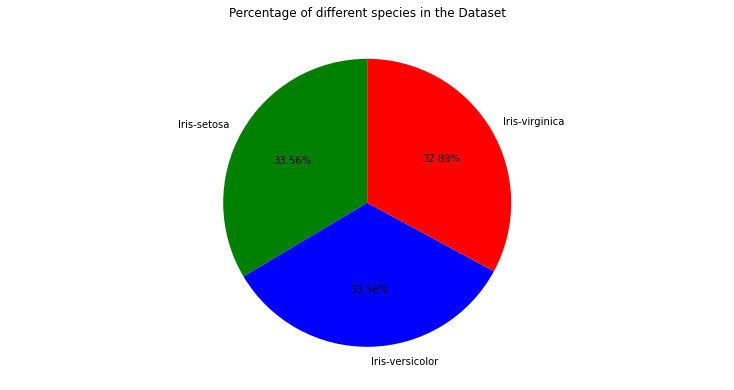

In [67]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['green','blue','red']
sp = iris_data['Species'].unique()
ct = iris_data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

In [68]:
# Check the Skewness
iris_data.skew()

sepal_lenght    0.303098
sepal_width     0.350101
petal_lenght   -0.289459
petal_width    -0.117808
dtype: float64

In [69]:
# Check the dublicates
dupes = iris_data.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
144    False
145    False
146    False
147    False
148    False
Length: 149, dtype: bool

<AxesSubplot:>

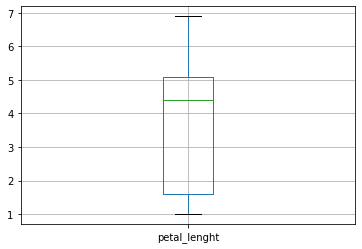

In [70]:
# Boxplot
iris_data.boxplot(column='petal_lenght')

In [71]:
#Check Measure of dispersion
iris_data.quantile(0.75)-iris_data.quantile(0.25)

sepal_lenght    1.3
sepal_width     0.5
petal_lenght    3.5
petal_width     1.5
dtype: float64

Text(0.5, 1.0, 'Species vs Sepal Length')

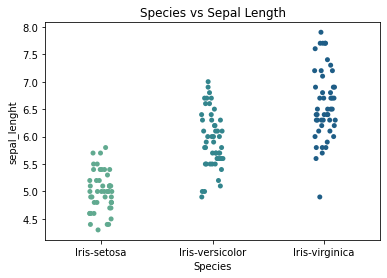

In [72]:
sns.stripplot(x='Species', y='sepal_lenght', data=iris_data, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

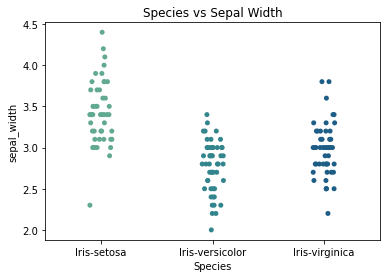

In [73]:
sns.stripplot(x='Species', y='sepal_width', data=iris_data, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

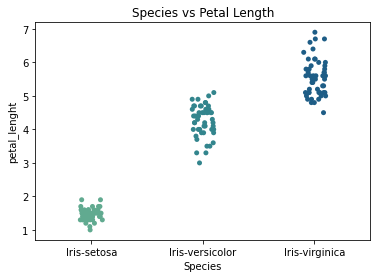

In [74]:
sns.stripplot(x='Species', y='petal_lenght', data=iris_data, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

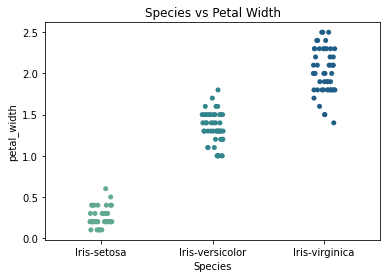

In [75]:
sns.stripplot(x='Species', y='petal_width', data=iris_data, palette='crest')
plt.title('Species vs Petal Width')

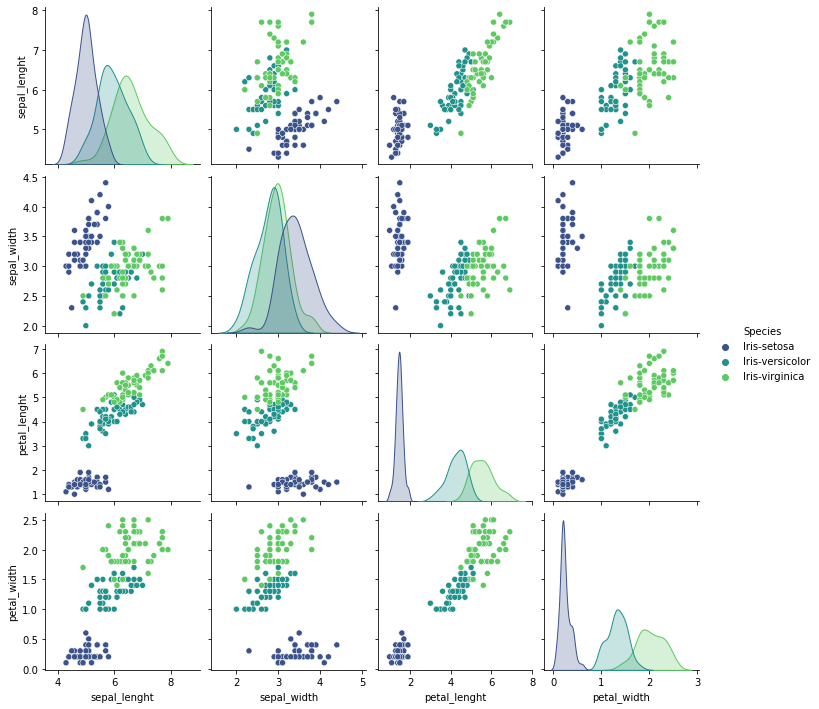

In [76]:
sns.pairplot(iris_data, hue = 'Species',palette='viridis')
plt.show()

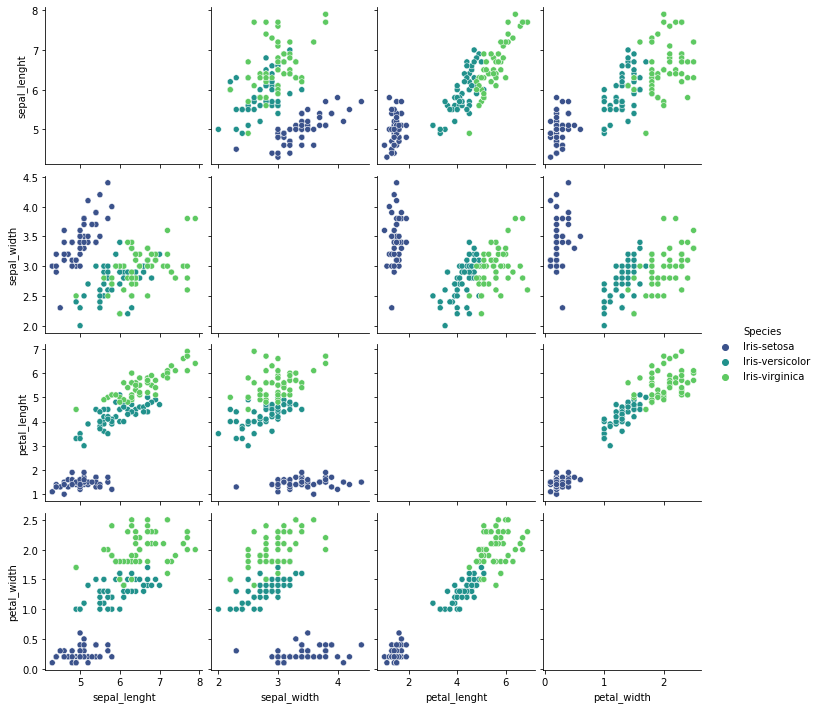

In [77]:

sns.pairplot(iris_data, hue = 'Species', palette='viridis', diag_kind = 'reg')

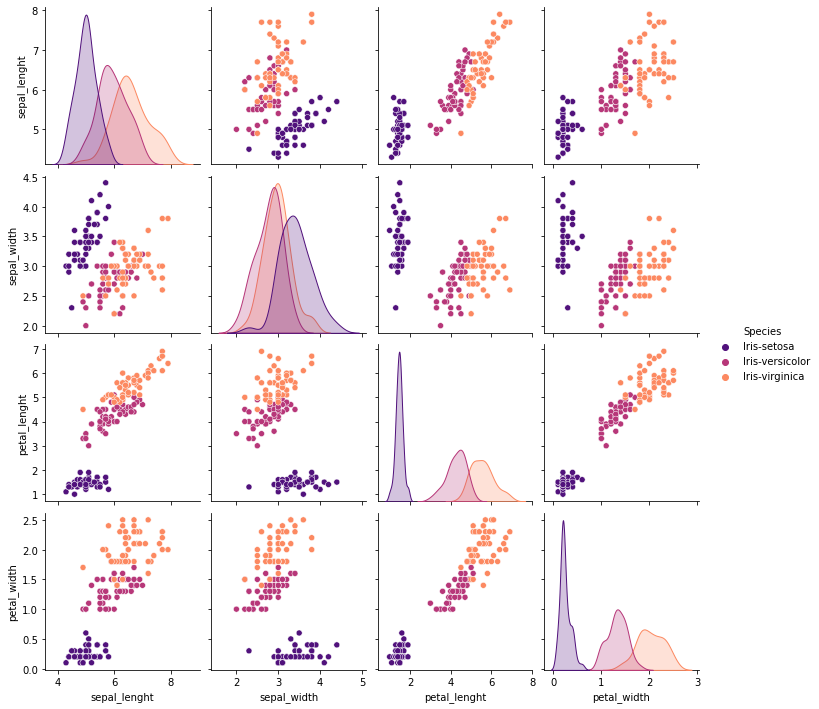

In [78]:

sns.pairplot(iris_data, hue = 'Species', palette='magma', diag_kind = 'kde')

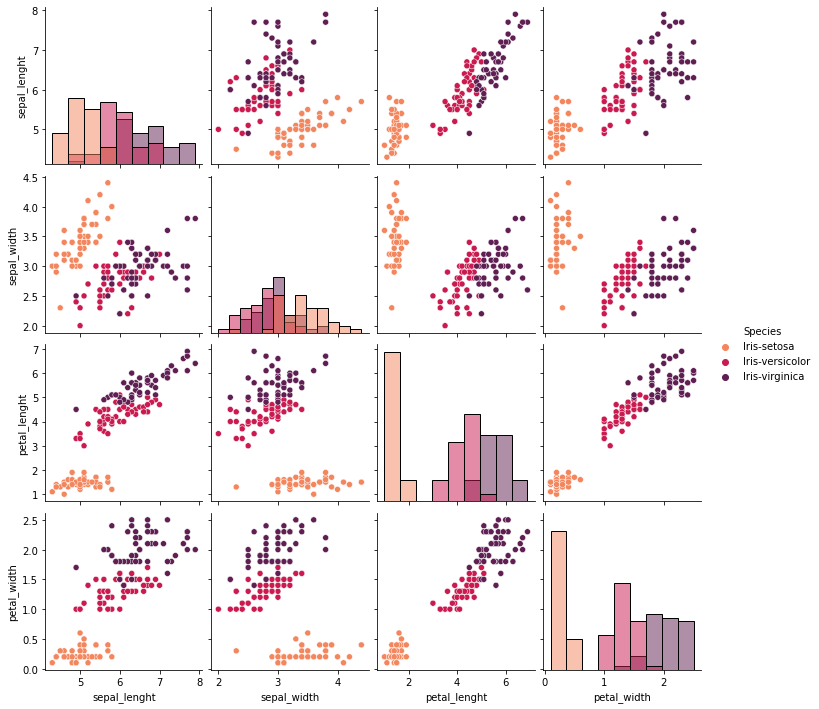

In [79]:
sns.pairplot(iris_data, hue = 'Species', palette='rocket_r', diag_kind = 'hist')

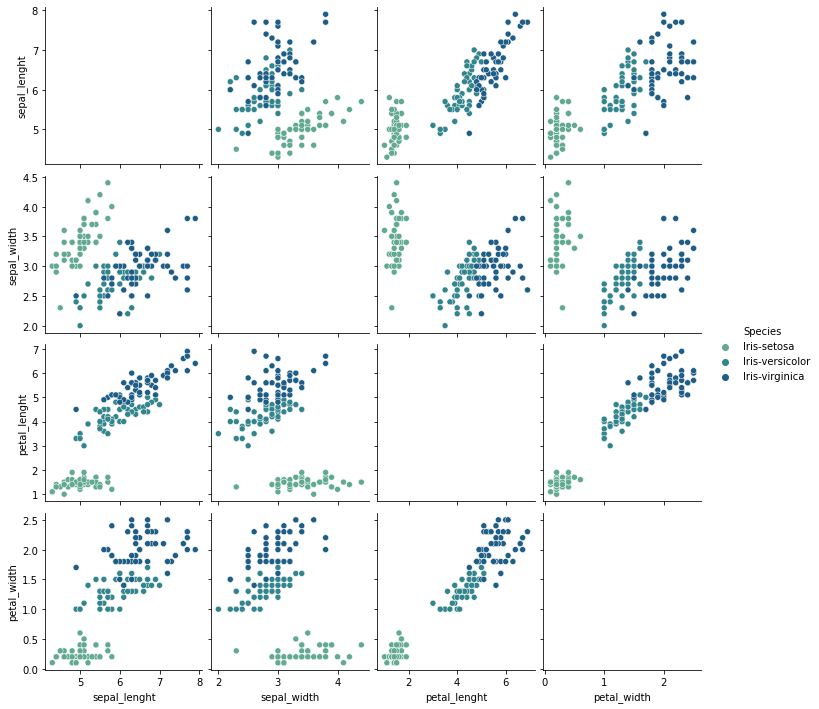

In [80]:
sns.pairplot(iris_data, hue = 'Species', palette='crest', diag_kind = 'scatter')

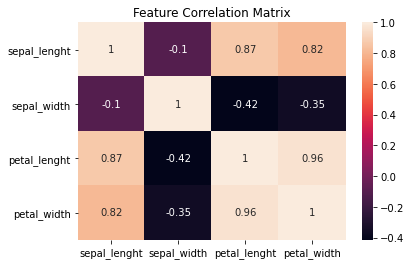

In [81]:
# plt.figure(figsize=(10,10))
matrix = iris_data.corr()
corMat = sns.heatmap(matrix, annot=True)
corMat.set_title("Feature Correlation Matrix")
plt.show()

# Decision Tree

In [88]:
x = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [89]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [90]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [91]:
# Scorring our Decision Tree
print(model.score(x_test,y_test))

0.9555555555555556


In [92]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa']


In [104]:
sc = DecisionTreeClassifier(criterion="entropy", random_state=20)
sc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [113]:
from sklearn import metrics
y_pred1 = sc.predict(x_test)
predicted1=y_pred1
actual=y_test
score_lr= accuracy_score(y_test,y_pred1)
print("Accuracy is:",score_lr)
print('Recall : {}'.format(metrics.recall_score(y_test, y_pred1, average='macro')))
print('Precision :{}'.format(metrics.precision_score(y_test, y_pred1, average='macro')))
results=confusion_matrix(actual,predicted1)
print('confusion matrix: \n',results)

Accuracy is: 0.9555555555555556
Recall : 0.9535256410256411
Precision :0.9535256410256411
confusion matrix: 
 [[16  0  0]
 [ 0 15  1]
 [ 0  1 12]]


In [114]:
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred1))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [115]:
feature_names = iris_data.columns[:4]
target_names = iris_data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width'], dtype='object')

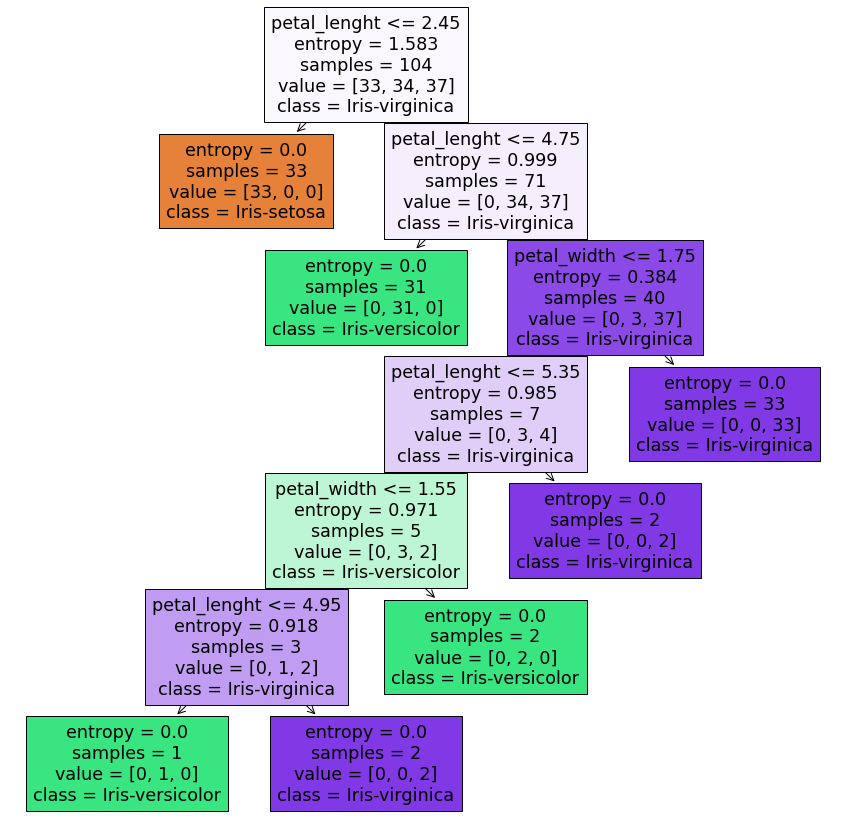

In [119]:
features = iris_data.columns[:-1]
classes = iris_data['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(sc, feature_names=features, class_names=classes, filled=True)
plt.show()

##### 